In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast
import seaborn as sns

dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda skill : ast.literal_eval(skill) if pd.notna(skill) else skill)


c:\Users\91735\Anaconda3\envs\python_data_project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
df_india=df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')]
df_india=df_india.dropna(subset=['salary_year_avg'])


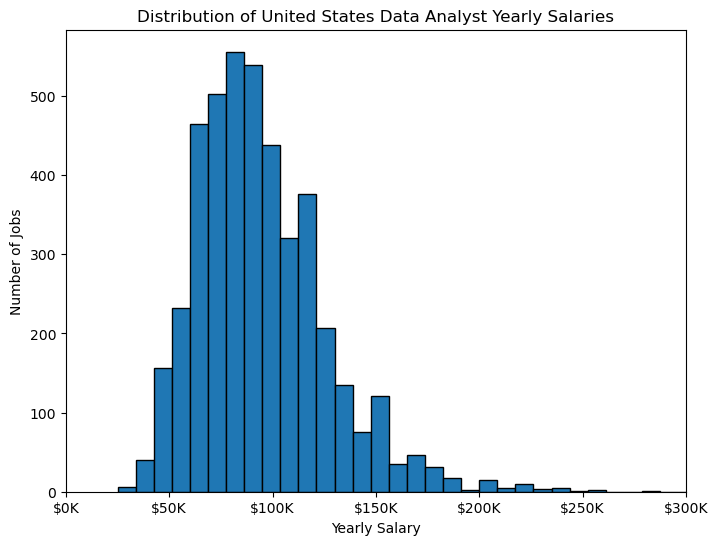

In [11]:
df_india['salary_year_avg'].plot(kind='hist',bins=40,edgecolor='black',figsize=(8,6))
plt.xlim(0,300000)

ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos : f'${int(x/1000)}K'))

plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.legend().set_visible(False)
plt.show()

<Figure size 800x600 with 0 Axes>

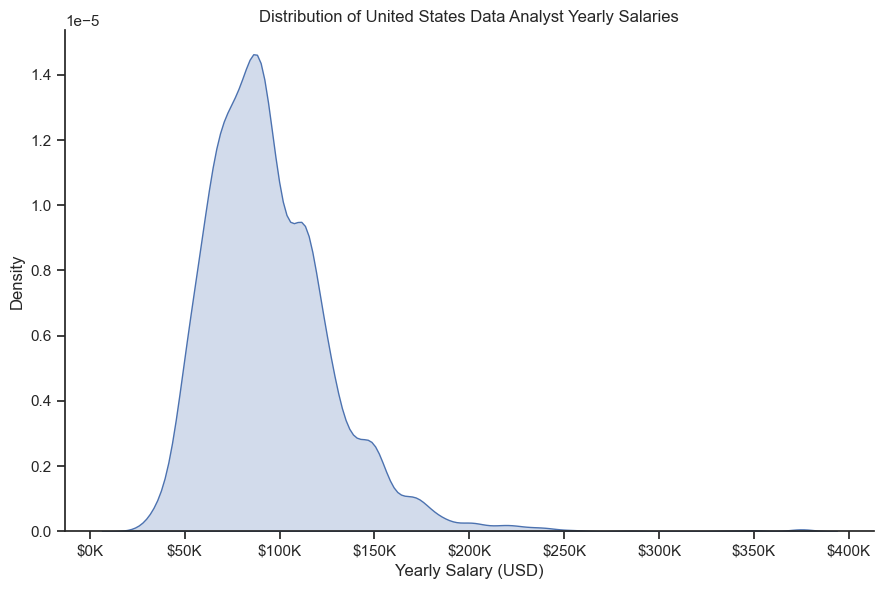

In [23]:
plt.figure(figsize=(8, 6))

sns.displot(df_india['salary_year_avg'],kind='kde',fill=True,common_norm=False,height=6, aspect=1.5)

plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Density') # Density is the probability of a random variable taking on a particular value
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.show()

#  Data Analyst, Data Engineer, and Data Scientist job salaries Distribution w/ Box Plot

In [4]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
df_us=df[(df['job_title_short'].isin(job_titles)) & (df['job_country']=='United States')].dropna(subset=['salary_year_avg'])

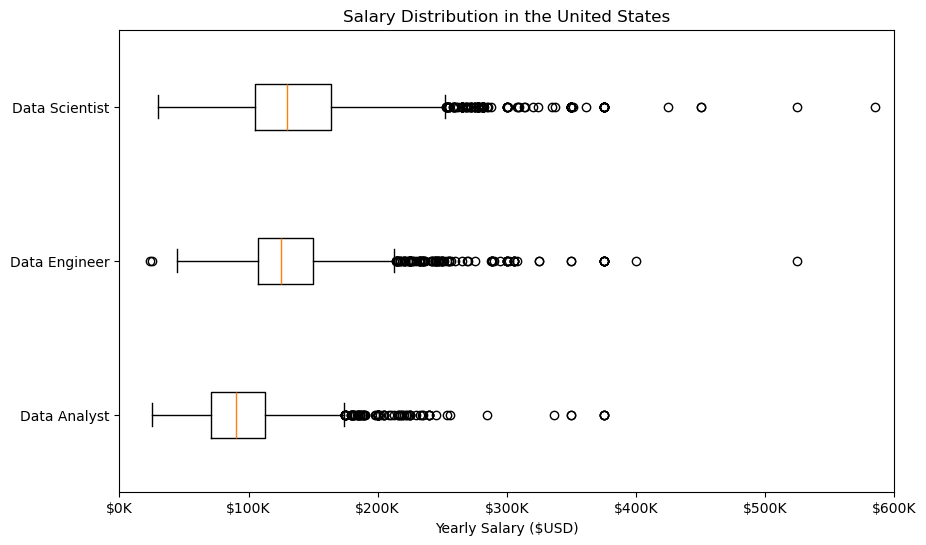

In [5]:
# list of salaries for each job title
job_list=[df_us[df_us['job_title_short']==job_title]['salary_year_avg'] for job_title in job_titles ]
plt.figure(figsize=(10, 6)) 
plt.boxplot(job_list,labels=job_titles,vert=False)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.xlim(0, 600000) 

# Format x-axis to show 'Thousands'
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

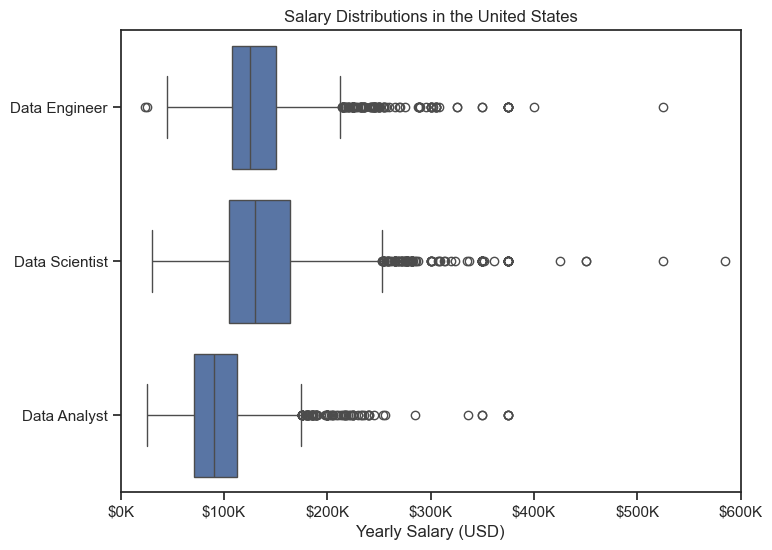

In [22]:
plt.figure(figsize=(8, 6))

sns.boxplot(data=df_us,x='salary_year_avg',y='job_title_short')
sns.set_theme(style='ticks')

plt.title('Salary Distributions in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()